<a href="https://colab.research.google.com/github/Raghav-Gupta24/Data-Analysis-Fitness-Brand/blob/main/Fitness_Brand_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Dataset Kaggle Link:

In [3]:
!wget --no-check-certificate -O  'fitness_data.csv' https://drive.google.com/uc?id=1kU3vx7jR8YxqZ_FQQdqf8M5N3R_KPzRa

--2024-05-04 14:55:25--  https://drive.google.com/uc?id=1kU3vx7jR8YxqZ_FQQdqf8M5N3R_KPzRa
Resolving drive.google.com (drive.google.com)... 172.217.204.113, 172.217.204.138, 172.217.204.102, ...
Connecting to drive.google.com (drive.google.com)|172.217.204.113|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1kU3vx7jR8YxqZ_FQQdqf8M5N3R_KPzRa [following]
--2024-05-04 14:55:25--  https://drive.usercontent.google.com/download?id=1kU3vx7jR8YxqZ_FQQdqf8M5N3R_KPzRa
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 74.125.134.132, 2607:f8b0:400c:c00::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|74.125.134.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7279 (7.1K) [application/octet-stream]
Saving to: ‘fitness_data.csv’

fitness_data.csv    100%[===================>]   7.11K  --.-KB/s    in 0s      

2024-05-04 14:55:25 (46.3 MB

In [4]:
df = pd.read_csv('/content/fitness_data.csv')
df

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47
...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,21,Single,6,5,83416,200
176,KP781,42,Male,18,Single,5,4,89641,200
177,KP781,45,Male,16,Single,5,5,90886,160
178,KP781,47,Male,18,Partnered,4,5,104581,120


#### Dataset Consists of:
- `Product`: Product Purchased KP281, KP481, or KP781
- `Age`: In years
- `Gender`: Male/Female
- `Education`: in years
- `MaritalStatus`: single or partnered
- `Usage`: average number of times the customer plans to use the treadmill each week
- `Income`: annual income (in $)
- `Fitness`: self-rated fitness on a 1-to-5 scale, where 1 is the poor shape and 5 is the excellent shape.
- `Miles`: average number of miles the customer expects to walk/run each week


In [5]:
df.shape

(180, 9)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


There are no missing values in this data.

In [7]:
df.nunique()

Product           3
Age              32
Gender            2
Education         8
MaritalStatus     2
Usage             6
Fitness           5
Income           62
Miles            37
dtype: int64

In [8]:
df['Product'].unique()

array(['KP281', 'KP481', 'KP781'], dtype=object)

There are 3 different Treadmill models: `KP281`, `KP481`, `KP781`

In [9]:
df.dtypes

Product          object
Age               int64
Gender           object
Education         int64
MaritalStatus    object
Usage             int64
Fitness           int64
Income            int64
Miles             int64
dtype: object

There are 3 `object` type features: `Product`, `MaritalStatus` and `Gender`

Remaining are `int64`

In [10]:
df.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


Lets analyse the different values of `Fitness` feature

In [11]:
df['Fitness'].unique()

array([4, 3, 2, 1, 5])

It seems that this feature is used to rate the fitness level of customers on a scale of 1 to 5.

Presumably with 1 indicating Poor Fitness and 5 indicating Excellent shape.

# Univariate Analysis and [Outlier Treatment](https://www.analyticsvidhya.com/blog/2021/05/feature-engineering-how-to-detect-and-remove-outliers-with-python-code/)

## Numerical Features

Will plot these individual features to get more clarity about their distribution.

### `Age`

<Axes: xlabel='Age', ylabel='Count'>

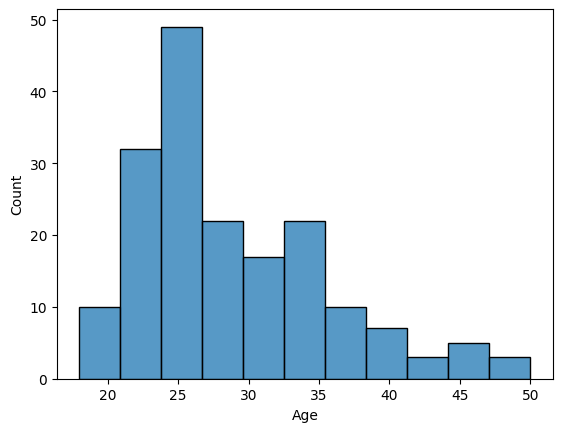

In [12]:
sns.histplot(df['Age'])

<Axes: ylabel='Age'>

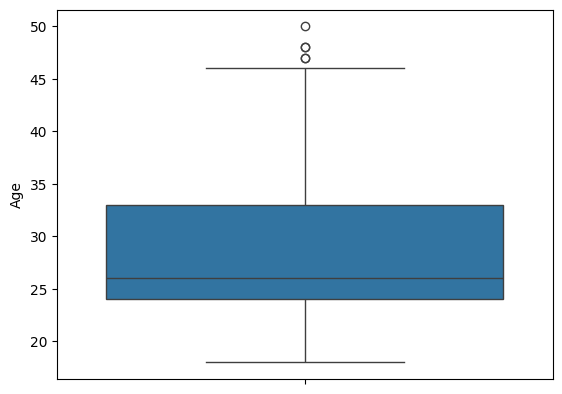

In [13]:
sns.boxplot(df['Age'])

In [14]:
df['Age'].describe()

count    180.000000
mean      28.788889
std        6.943498
min       18.000000
25%       24.000000
50%       26.000000
75%       33.000000
max       50.000000
Name: Age, dtype: float64

**Inference:**
- The customer profile of people purchasing treadmill ranges from 18 to 50 years of age.
- Most customers are young adults (22 to 28 year olds)
- It is rare that a customer purchasing treadmill will be old (>37 years)
- There are a few outlier cases where age > 46

<br>

Since this is a skewed distribution, we can remove outliers using **InterQuartile Range.**



In [15]:
q1 = df['Age'].quantile(0.25)
q3 = df['Age'].quantile(0.75)

In [16]:
q1, q3

(24.0, 33.0)

In [17]:
iqr = q3 - q1
iqr

9.0

In [18]:
lower_limit = q1 - (1.5 * iqr)
upper_limit = q3 + (1.5 * iqr)

lower_limit, upper_limit

(10.5, 46.5)

Since there are no datapoints below the lower limit.

We need to clip the datapoints with age > 46.5

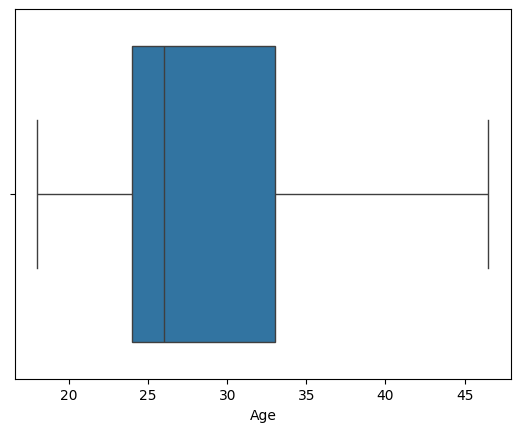

In [19]:
df_clip = df.copy()
df_clip["Age"] = np.clip(df_clip["Age"], a_min=None, a_max=upper_limit)

sns.boxplot(x = "Age", data = df_clip)
plt.show()

In [20]:
df_clip['Age'].describe()

count    180.000000
mean      28.747222
std        6.828608
min       18.000000
25%       24.000000
50%       26.000000
75%       33.000000
max       46.500000
Name: Age, dtype: float64

In [21]:
df['Age'].mean(), df_clip['Age'].mean()

(28.788888888888888, 28.747222222222224)

In [22]:
df['Age'].std(), df_clip['Age'].std()

(6.943498135399795, 6.828607508782491)

Hence, clipping outliers impacts the distribution by removing the influence on mean and std dev values.

<br>

Alternatively, we can also replace the values of these `5` records with `46` instead of clipping them altogether.

In [23]:
df.loc[df['Age'] > 46.5]

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
78,KP281,47,Male,16,Partnered,4,3,56850,94
79,KP281,50,Female,16,Partnered,3,3,64809,66
139,KP481,48,Male,16,Partnered,2,3,57987,64
178,KP781,47,Male,18,Partnered,4,5,104581,120
179,KP781,48,Male,18,Partnered,4,5,95508,180


In [24]:
len(df.loc[df['Age'] > 46.5])

5

### `Education`

<Axes: xlabel='Education', ylabel='Count'>

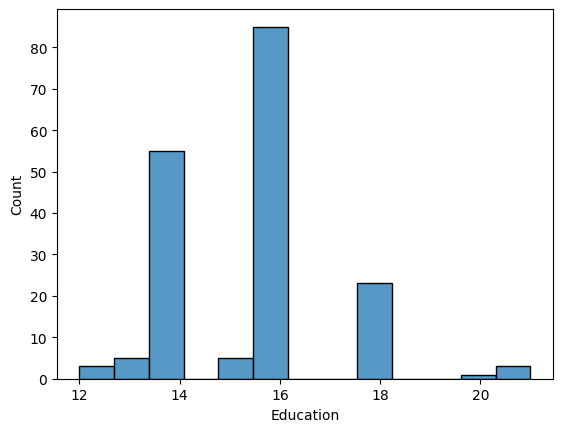

In [25]:
sns.histplot(df['Education'])

This distribution looks Gaussian.

Checking the same.

In [26]:
from scipy import stats

In [27]:
stat, pvalue = stats.normaltest(df["Education"])
print(pvalue)

if pvalue < 0.05:
  print("Data is not Normal")
else:
  print("Data is Normally distributed")

0.0003989877746126755
Data is not Normal


This is because though the data looks like it follows Normal distribution, it is actually a **discrete** numeric feature, and not continuous.

This is evident from the histogram as well.

As it's value represents the number of years.

<br>

A better plot to visualise this feature would be a **Piechart**.

In [28]:
x = df['Education'].value_counts()
x

Education
16    85
14    55
18    23
15     5
13     5
12     3
21     3
20     1
Name: count, dtype: int64

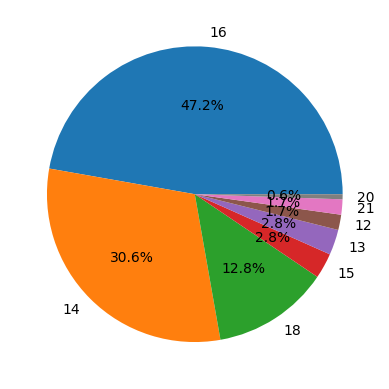

In [29]:
plt.pie(x.values,
        labels=x.index,
        autopct='%1.1f%%')
plt.show()

<Axes: ylabel='Education'>

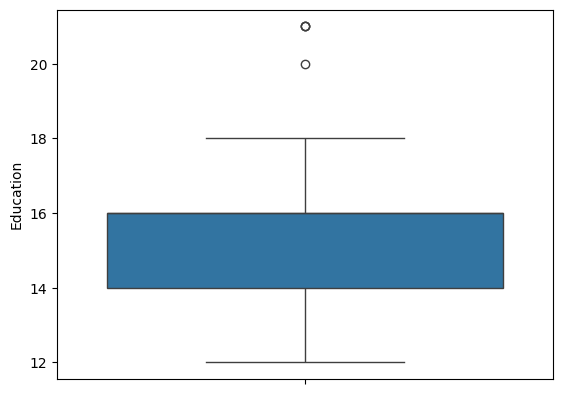

In [30]:
sns.boxplot(df['Education'])

In [31]:
df['Education'].describe()

count    180.000000
mean      15.572222
std        1.617055
min       12.000000
25%       14.000000
50%       16.000000
75%       16.000000
max       21.000000
Name: Education, dtype: float64

In [32]:
df['Education'].value_counts()

Education
16    85
14    55
18    23
15     5
13     5
12     3
21     3
20     1
Name: count, dtype: int64

**Inference:**
- Majority of customers have had `16, 14 and 18` years of education.
- From the boxplot and `.describe()` we know that 50th and 75th quantile co-incides at `16`, indicative of its frequent occurence.
- There are a few outliers in data (>18).
  - These values are very less in number (4), and do not add any special significnce.
  - Hence, in order to treat them, we can replace the value of these cases with `18`.
- Similarly, though values of `12, 13, and 15` are inliers, they are much less likely to be encountered.
  - Perhaps they indicate individuals who dropped out early.


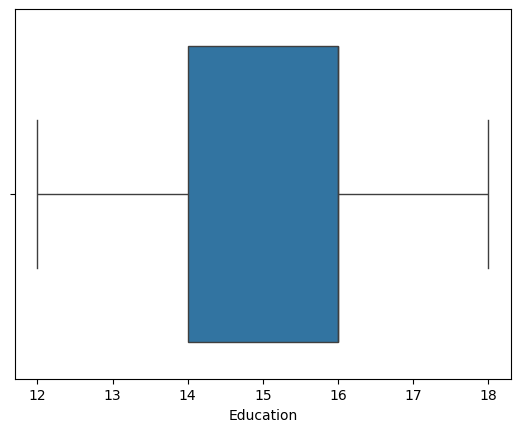

In [33]:
df_clip.loc[df_clip['Education'] > 18, 'Education'] = 18

sns.boxplot(x = "Education", data = df_clip)
plt.show()

In [34]:
df_clip['Education'].describe()

count    180.000000
mean      15.511111
std        1.462717
min       12.000000
25%       14.000000
50%       16.000000
75%       16.000000
max       18.000000
Name: Education, dtype: float64

In [35]:
df['Education'].mean(), df_clip['Education'].mean()

(15.572222222222223, 15.511111111111111)

In [36]:
df['Education'].std(), df_clip['Education'].std()

(1.6170548978065569, 1.4627168755355262)

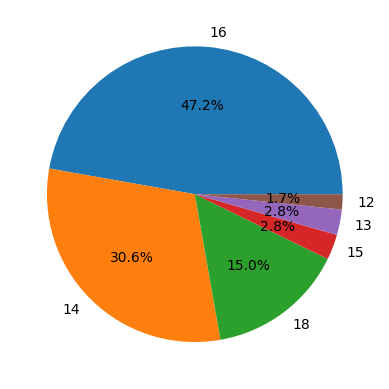

In [37]:
x = df_clip['Education'].value_counts()

plt.pie(x.values,
        labels=x.index,
        autopct='%1.1f%%')
plt.show()

### `Income`

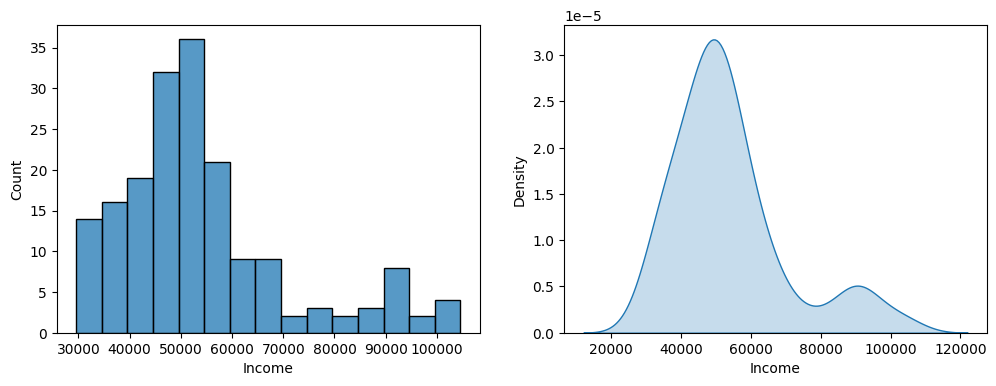

In [38]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
sns.histplot(df['Income'])

plt.subplot(1, 2, 2)
sns.kdeplot(df['Income'], fill=True)

plt.show()

<Axes: ylabel='Income'>

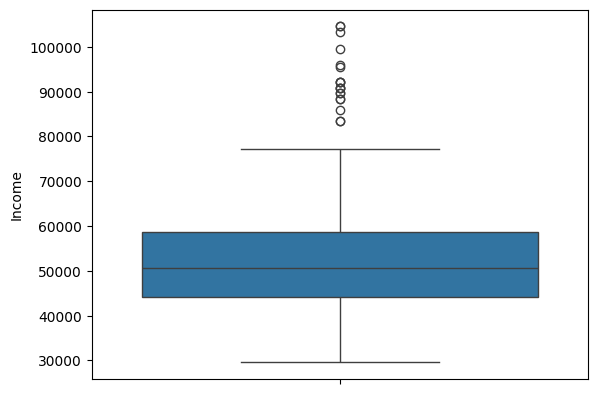

In [39]:
sns.boxplot(df['Income'])

In [40]:
df['Income'].describe()

count       180.000000
mean      53719.577778
std       16506.684226
min       29562.000000
25%       44058.750000
50%       50596.500000
75%       58668.000000
max      104581.000000
Name: Income, dtype: float64

In [41]:
# Percentage of people with income > 77,000
len(df.loc[df['Income'] > 77000]) * 100 / len(df)

11.11111111111111

**Inference:**
- It is a continuous numeric variable.
- The mean value is greater than the median. Hence, the distribution is **Positively Skewed**.
  - This is also evident from the histogram.
- This is because there are certain customers that have very high incomes.
  - This can also be seen from values of 75th and 100th percentile.

<Br>

These outlier income values may be useful from analysis standpoint.

As a person with high income might be more interested in a expensive model, regardless of other variables.

### `Miles`

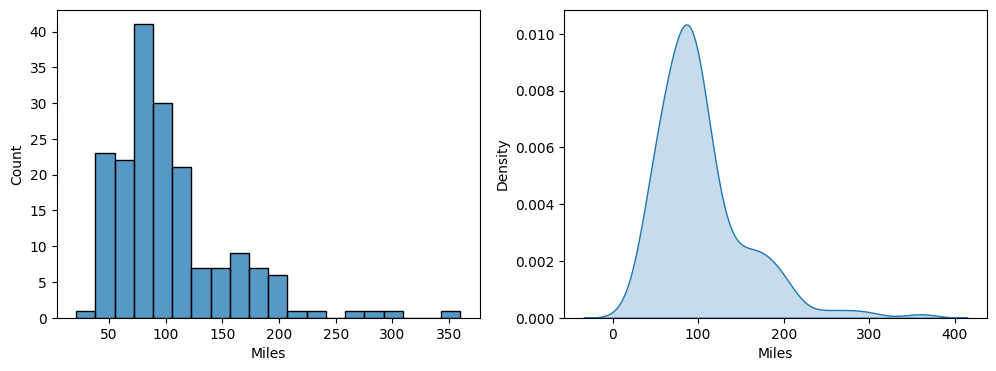

In [42]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
sns.histplot(df['Miles'])

plt.subplot(1, 2, 2)
sns.kdeplot(df['Miles'], fill=True)

plt.show()

In [43]:
df['Miles'].describe()

count    180.000000
mean     103.194444
std       51.863605
min       21.000000
25%       66.000000
50%       94.000000
75%      114.750000
max      360.000000
Name: Miles, dtype: float64

<Axes: ylabel='Miles'>

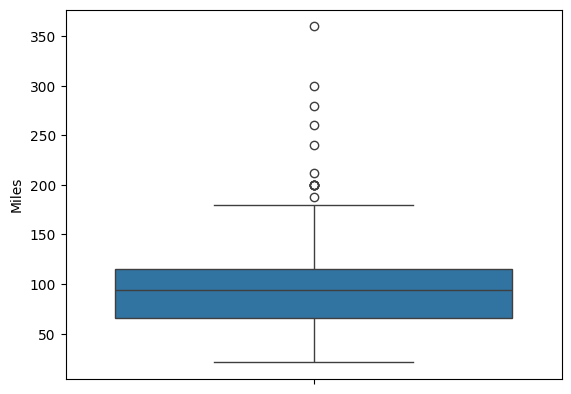

In [44]:
sns.boxplot(df['Miles'])

**Inference:**
- This is a continuous numerical feature.
- The distribution for number of miles run by customers is **Positively skewed**.
  - This is because there are few outlier customers that run unusually high number of miles.

<br>

`Miles` is an important feature, as it can help predict which model would better suit customer needs.

However, we can replace the outlier values with a high value cap.

This is because we don't need to know exact number of miles they run, just need to get an idea.

Hence capping would capture that without causing data loss.


In [45]:
q1 = df['Miles'].quantile(0.25)
q3 = df['Miles'].quantile(0.75)

iqr = q3 - q1

upper_limit = q3 + (1.5 * iqr)
upper_limit

187.875

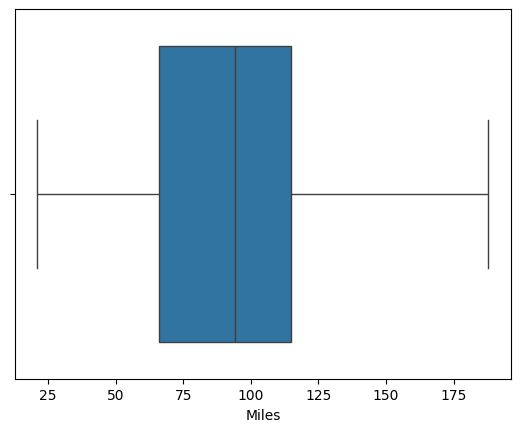

In [46]:
df_clip.loc[df_clip['Miles'] > upper_limit, 'Miles'] = upper_limit

sns.boxplot(x = "Miles", data = df_clip)
plt.show()

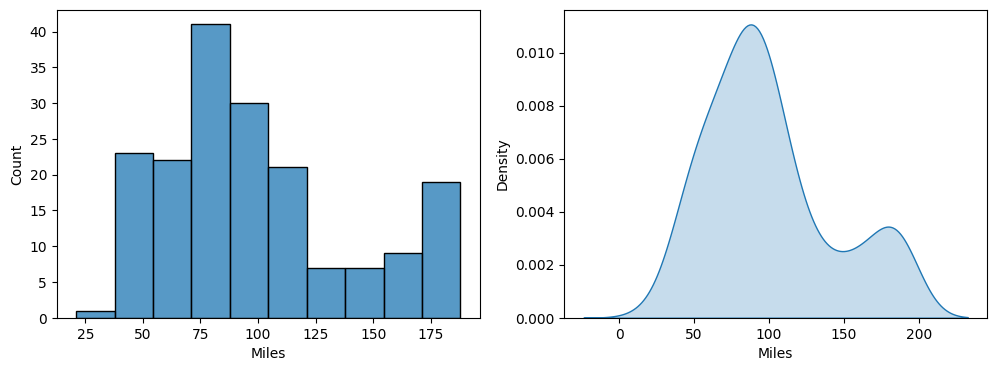

In [47]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
sns.histplot(df_clip['Miles'])

plt.subplot(1, 2, 2)
sns.kdeplot(df_clip['Miles'], fill=True)

plt.show()

In [48]:
df_clip['Miles'].describe()

count    180.000000
mean      99.874306
std       42.163049
min       21.000000
25%       66.000000
50%       94.000000
75%      114.750000
max      187.875000
Name: Miles, dtype: float64

In [49]:
df['Miles'].mean(), df_clip['Miles'].mean()

(103.19444444444444, 99.87430555555555)

In [50]:
df['Miles'].std(), df_clip['Miles'].std()

(51.86360466180931, 42.16304872263957)

In [51]:
df['Miles'].skew(), df_clip['Miles'].skew()

(1.7244965928707188, 0.7395030872651497)

**Note:**
- Since we replaced all outliers to have value of `upper_limit`, there is now a peak around that region
- Hence, there are now 2 local maximas in data.
- Further, though the mean is also impacted, there is a significant drop in standard deviation value.
- Distribution is still **moderately skewed**
  - Indicated by mean and median values.

---

## Ordinal Features (Categorical with implicit ranks)

### `Fitness`

In [ ]:
x = df['Fitness'].value_counts()
x

Fitness
3    97
5    31
2    26
4    24
1     2
Name: count, dtype: int64

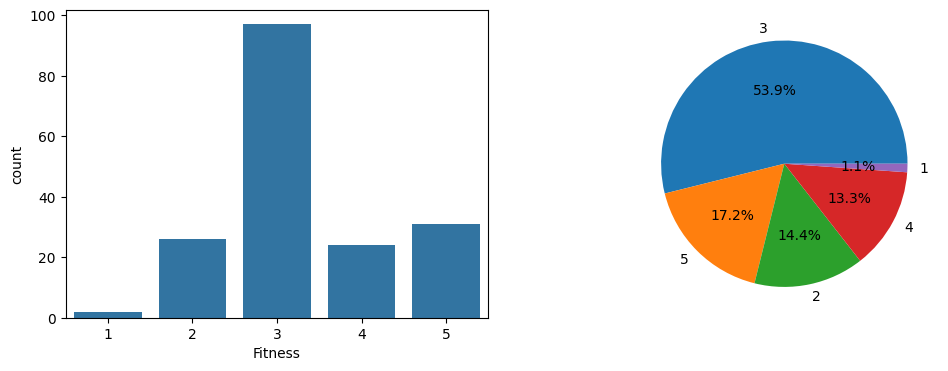

In [ ]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
sns.countplot(df, x='Fitness', orient='v')

plt.subplot(1, 2, 2)
plt.pie(x.values,
        labels=x.index,
        autopct='%1.1f%%')
plt.show()

<Axes: ylabel='Fitness'>

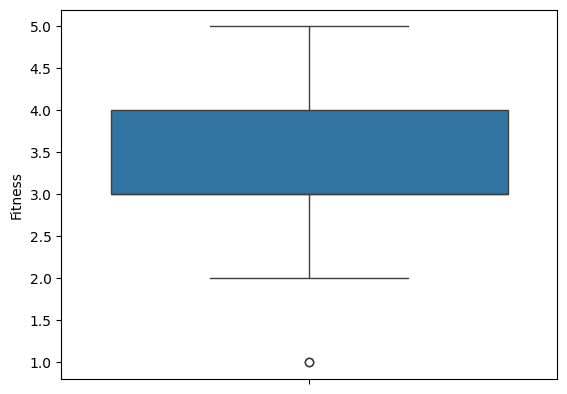

In [ ]:
sns.boxplot(df['Fitness'])

**Inference:**
- It is an **ordinal feature**, i.e. categorical feature where categories have a rank/order.
- No outliers. All values in range of [0, 5]
- Majority of customers are moderately fit (Fitness score = 3), i.e. 53.9%
- Very few (1.1%) have very poor fitness (score = 1)
 - People with very poor fitness do not buy.
- Second most major category of customers are very fit (score=5), i.e. 17.2%
 - Hence, generally, fit people buy treadmills.

### `Usage`

In [ ]:
x = df['Usage'].value_counts()
x

Usage
3    69
4    52
2    33
5    17
6     7
7     2
Name: count, dtype: int64

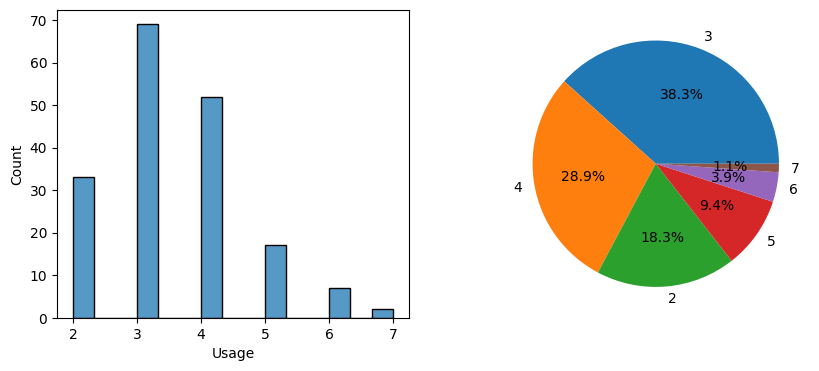

In [ ]:
plt.figure(figsize=(10,4))

plt.subplot(121)
sns.histplot(df['Usage'])

plt.subplot(122)
plt.pie(x.values,
        labels=x.index,
        autopct='%1.1f%%')
plt.show()

<Axes: ylabel='Usage'>

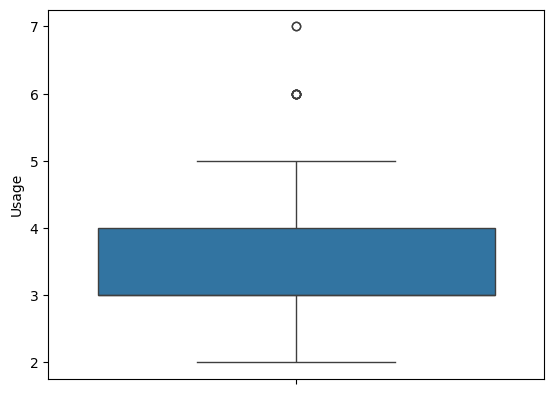

In [ ]:
sns.boxplot(df['Usage'])

**Inference:**
- Majority of customers plan on using their treadmill 3 or 4 times a week.
- There are no customers that plan on using it only once a week.
- It is rare to encounter a customer that plans to use it all 7 days (1.1%)
- Based on the frequeny of occurence, values `6 and 7` seem to be outliers, however, they may be important.
  - A customer aiming to use the treadmill 6 or 7 days, would be looking for a model that is more **durable and lasting**.
  - Whereas, someone who expects to use it only 2 or 3 times a week, might be okay with a cheaper model.

<br>

Hence, not performing outlier treatment here.

In this case, an anomaly would've been a value > 7 or < 1

## Categorical Features

In [52]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


### `Product`

In [53]:
x = df['Product'].value_counts()
x

Product
KP281    80
KP481    60
KP781    40
Name: count, dtype: int64

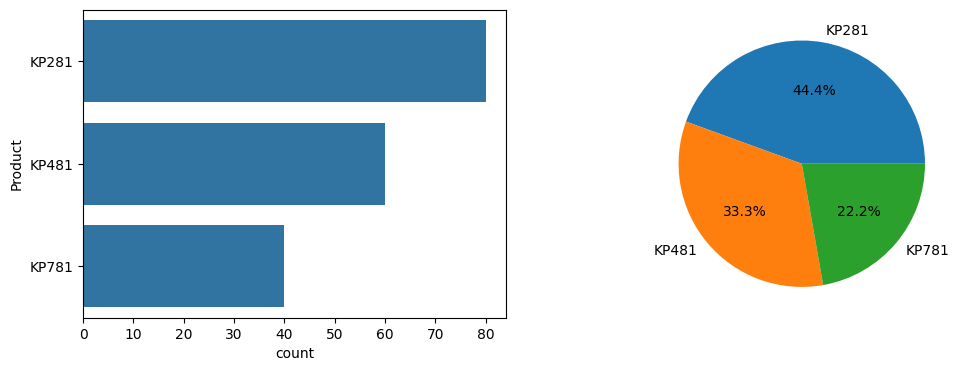

In [54]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
sns.countplot(df['Product'])

plt.subplot(1, 2, 2)
plt.pie(x.values,
        labels=x.index,
        autopct='%1.1f%%')
plt.show()

**Inference:**
- The economical model (KP281) is the highest selling (44.4%).
- Whereas the expensive model (KP781) is lowest selling (22.2%).

### `Gender`

In [55]:
x = df['Gender'].value_counts()
x

Gender
Male      104
Female     76
Name: count, dtype: int64

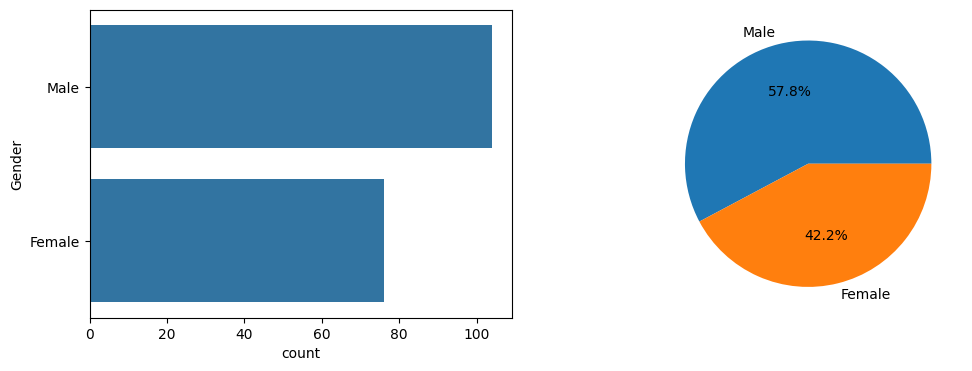

In [56]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
sns.countplot(df['Gender'])

plt.subplot(1, 2, 2)
plt.pie(x.values,
        labels=x.index,
        autopct='%1.1f%%')
plt.show()

**Inference:** Majority of customers are males (52.8%)

### `MaritalStatus`

In [57]:
x = df['MaritalStatus'].value_counts()
x

MaritalStatus
Partnered    107
Single        73
Name: count, dtype: int64

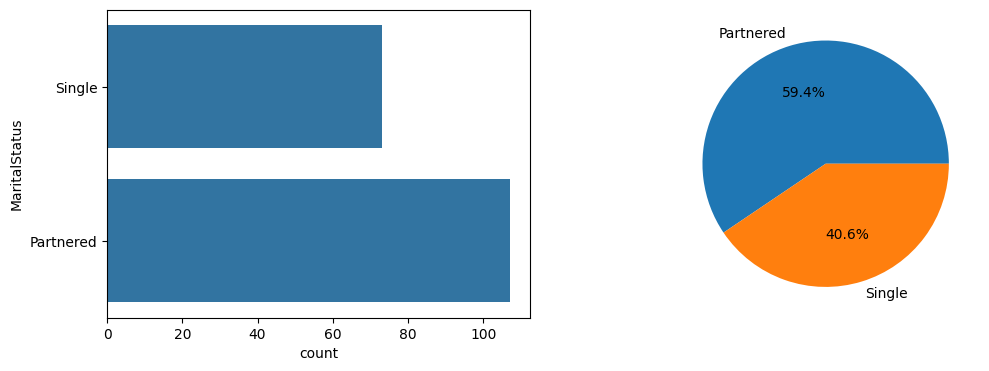

In [58]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
sns.countplot(df['MaritalStatus'])

plt.subplot(1, 2, 2)
plt.pie(x.values,
        labels=x.index,
        autopct='%1.1f%%')
plt.show()

**Inference:** Majority of customers are partnered (59.4%).

---

# Bivariate Analysis and Hypothesis Testing (Statistical Analysis)

# Categorical Features

### `Gender` vs `Product`

<Axes: xlabel='Product', ylabel='count'>

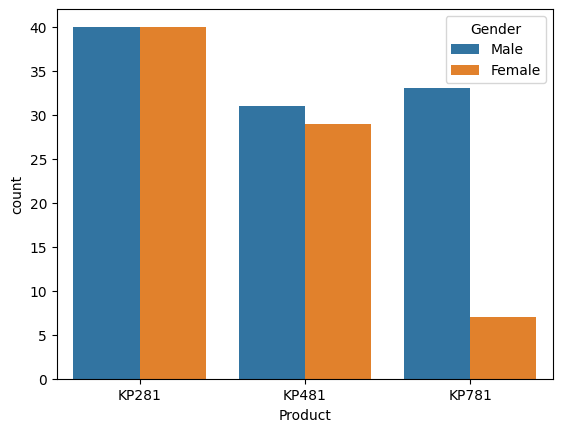

In [65]:
sns.countplot(x='Product', hue='Gender', data=df)

**Inference:**
- KP781 model is most frequently bought by male customers.
- Other model have approximately equal number of male and female cstomers.
- KP281 is the most popular model among both males and females
- KP481 is the least bought model among males.

In [66]:
df['Gender'].value_counts()

Gender
Male      104
Female     76
Name: count, dtype: int64

Note: There is imbalance in the number of male and females in the data. They are not equal.

Calculating probability values.

In [67]:
pd.crosstab(index=df['Gender'], columns=df['Product'], margins=True)

Product,KP281,KP481,KP781,All
Gender,,,,
Female,40,29,7,76
Male,40,31,33,104
All,80,60,40,180


In [68]:
# 29/60

**MArginal Probabillity:**
- $P(Male) = \frac{104}{180} = 0.578$
- $P(Female) = \frac{76}{180} = 0.422$

<br>

**Conditional Probability (Conditioned on Gender)**
- P(KP281 | Male) $= \frac{40}{104} = 0.385$
- P(KP481 | Male) $= \frac{31}{104} = 0.298$
- P(KP781 | Male) $= \frac{33}{104} = 0.317$

<Br>

- P(KP281 | Female) $= \frac{40}{76} = 0.526$
- P(KP481 | Female) $= \frac{29}{76} = 0.381$
- P(KP781 | Female) $= \frac{7}{76} = 0.092$

<Br>

**Conditional Probability (Conditioned on Product)**
- P(Male | KP281) $= \frac{40}{80} = 0.5$
- P(Female | KP281) $= \frac{40}{80} = 0.5$

<br>

- P(Male | KP481) $= \frac{31}{60} = 0.516$
- P(Female | KP481) $= \frac{29}{60} = 0.483$

<Br>

- P(Male | KP781) $= \frac{33}{40} = 0.825$
- P(Female | KP781) $= \frac{7}{40} = 0.175$


#### HT: Does Gender impact which model is purchased by a customer?

> **Setting up Hypothesis**

- H0: Gender does not impact buying of product
- Ha: Gender impacts buying of product

In [69]:
df['Gender'].value_counts()

Gender
Male      104
Female     76
Name: count, dtype: int64

In [70]:
gender_product = pd.crosstab(index=df['Gender'], columns=df['Product'])
gender_product

Product,KP281,KP481,KP781
Gender,,,
Female,40,29,7
Male,40,31,33


> **Selecting Hypothesis Test**

Since we're trying to determine whether two categorical features are dependent or not, we need to use **Chi Squared Test for Indenependence**.

In [71]:
from scipy.stats import chi2_contingency

> **Conducting Hypothesis Test**

In [72]:
chi_stat, p_value, dof, exp_freq = chi2_contingency(gender_product)

print("chi_stat:",chi_stat)
print("p_value:",p_value)
print("dof:",dof)
print("exp_freq:",exp_freq)

chi_stat: 12.923836032388664
p_value: 0.0015617972833158714
dof: 2
exp_freq: [[33.77777778 25.33333333 16.88888889]
 [46.22222222 34.66666667 23.11111111]]


> **Interpreting results**

In [73]:
if p_value < 0.05:
  print("We reject the Null Hypothesis")
  print("Gender impacts buying of product")
else:
  print("We fail to reject Null Hypothesis")
  print("Gender does not impact buying of product")

We reject the Null Hypothesis
Gender impacts buying of product


> **Business Insights:**
- As per the expected frequencies, we can see that men have a tendency to go for the more expensive model KP781.
- Females tend to refrain from it (KP781), and go for cheaper models instead (KP281 and KP481)

### `Marital Status` vs `Product`

<Axes: xlabel='Product', ylabel='count'>

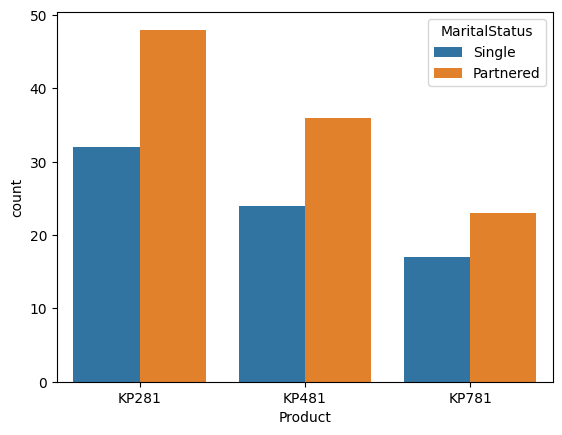

In [74]:
sns.countplot(x='Product', hue='MaritalStatus', data=df)

**Inference:**
- Partnered individuals seem to be more serious for their fitness, hence more inclined to buying treadmills.
- This trend can be seen across all models.

In [75]:
pd.crosstab(index=df['MaritalStatus'], columns=df['Product'], margins=True, normalize=True)

Product,KP281,KP481,KP781,All
MaritalStatus,,,,
Partnered,0.266667,0.200000,0.127778,0.594444
Single,0.177778,0.133333,0.094444,0.405556
All,0.444444,0.333333,0.222222,1.000000


In [76]:
# 0.094444 / 0.222222

**Marginal Prob:**
- P(Single) = 0.405
- P(Partnered) = 0.594

<br>

**Conditional Prob (Conditioned on Marital Status):**
- P(KP281 | Partnered) = 0.448
- P(KP481 | Partnered) = 0.336
- P(KP781 | Partnered) = 0.215

<br>

- P(KP281 | Single) = 0.438
- P(KP481 | Single) = 0.329
- P(KP781 | Single) = 0.233

<Br>

**Conditional Prob (Conditioned on Product):**
- P(Partnered | KP281) = 0.6
- P(Single | KP281) = 0.4

<br>

- P(Partnered | KP481) = 0.6
- P(Single | KP481) = 0.39999 ≈ 0.4

<Br>

- P(Partnered | KP781) = 0.575
- P(Single | KP781) = 0.425


#### HT: Does MaritalStatus impact product bought?

> **Setting up Hypothesis**

- H0: MaritalStatus does not impact buying of product
- Ha: MaritalStatus impacts buying of product

In [118]:
df['MaritalStatus'].value_counts()

MaritalStatus
Partnered    107
Single        73
Name: count, dtype: int64

In [122]:
marital_status_product = pd.crosstab(index=df['MaritalStatus'], columns=df['Product'])
marital_status_product

Product,KP281,KP481,KP781
MaritalStatus,,,
Partnered,48,36,23
Single,32,24,17


> **Selecting Hypothesis Test**

Since we're trying to determine whether two categorical features are dependent or not, we need to use **Chi Squared Test for Indenependence**.

> **Conducting Hypothesis Test**

In [123]:
chi_stat, p_value, dof, exp_freq = chi2_contingency(marital_status_product)

print("chi_stat:",chi_stat)
print("p_value:",p_value)
print("dof:",dof)
print("exp_freq:",exp_freq)

chi_stat: 0.0806554858532839
p_value: 0.9604745988058153
dof: 2
exp_freq: [[47.55555556 35.66666667 23.77777778]
 [32.44444444 24.33333333 16.22222222]]


> **Interpreting results**

In [124]:
if p_value < 0.05:
  print("We reject the Null Hypothesis")
  print("MaritalStatus impacts buying of product")
else:
  print("We fail to reject Null Hypothesis")
  print("MaritalStatus does not impact buying of product")

We fail to reject Null Hypothesis
Gender does not impact buying of product


> **Business Insights:**
- The expected and observed frequencies are approximately same.
- And as per the pvalue also, we can conclude that MaritalStatus does not play a role in determining which model customer might opt.
- Hence, if goal of using this data is for prediction, we can drop this feature.

### `Fitness` vs `Product`

<Axes: xlabel='Product', ylabel='count'>

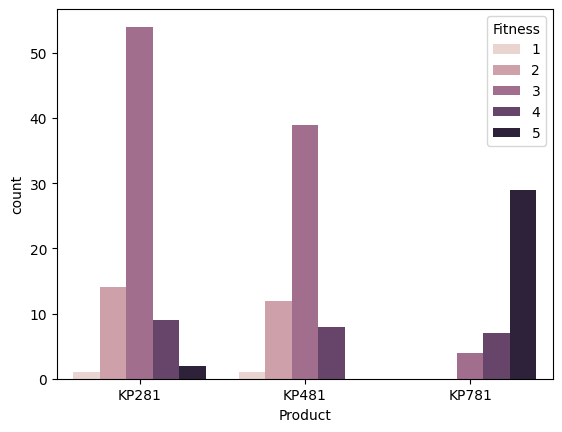

In [77]:
sns.countplot(x="Product", hue="Fitness", data=df)

In [78]:
pd.crosstab(index=df['Fitness'], columns=df['Product'], margins=True)

Product,KP281,KP481,KP781,All
Fitness,,,,
1,1,1,0,2
2,14,12,0,26
3,54,39,4,97
4,9,8,7,24
5,2,0,29,31
All,80,60,40,180


In [79]:
29/40

0.725

**Inference:** Target audience for the brand should be moderately and highly fit individuals (Fitness = 3 and 5)

KP281
- Majority customers have Fitness = 3.
 - P(Fitness=3 | KP281) = $\frac{39}{60} = 0.675$
- We already know that people with Fitness=1 do not generally buy treadmills.
 - P(Fitness=1) = $\frac{2}{180} = 0.0112$
- But it is very rare for a person with Fitness = 5 to purchase this model.
 - P(Fitness=5 | KP281) $= \frac{2}{80} = 0.025$

KP481
- Major target audience is people with Fitness=3
 - P(Fitness=3 | KP481) $= \frac{39}{60} = 0.65$
- There are no customers of this model, that have Fitness=5
  - P(Fitness=5 | KP481) = 0

KP781
- Majority of customers of this model are people with Fitness=5
 - P(Fitness=5 | KP781) $= \frac{29}{40} = 0.725$
- No customers of this model have Fitness=1 or 2
 - P(Fitness=1 ∪ Fitness=2 | KP781) = 0

### `Gender` vs `Fitness`

<Axes: xlabel='Fitness', ylabel='count'>

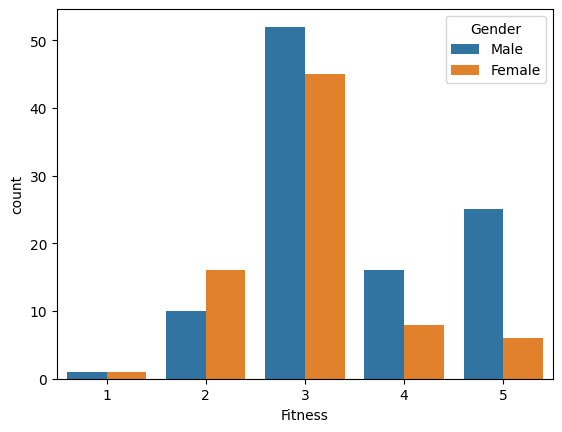

In [153]:
sns.countplot(x="Fitness", hue="Gender", data=df)

In [154]:
pd.crosstab(index=df['Fitness'], columns=df['Gender'], margins=True)

Gender,Female,Male,All
Fitness,,,
1,1,1,2
2,16,10,26
3,45,52,97
4,8,16,24
5,6,25,31
All,76,104,180


**Inference:**
- Proportion of men is higher in most categories (excpt 1 and 2).
- But this is not clearly indicative of anything, since the number of male customers is higher in our data.
- Therefore Empirical probability values will be biased.

<br>

We can perform a statistical test to check and see

#### HT: Is the average fitness level of males and females same?

> **Setting thr Hypothesis**

- H0: Average fitness levels of men and women is same ($\mu_1 = μ_2$).
- Ha: Average fitness levels of men and women is statistically different ($μ_1 \neq μ_2$).



In [81]:
fitness_men = df[df["Gender"] == "Male"]["Fitness"]
fitness_women = df[df["Gender"] == "Female"]["Fitness"]

len(fitness_men), len(fitness_women)

(104, 76)

In [83]:
fitness_men.mean()

3.519230769230769

In [84]:
fitness_women.mean()

3.026315789473684

We need to check whether this observed deviation in mean fitness score is due to chance, or it is statistically significant.

<br>

> **Selecting Hypothesis Test**

Since we're trying to compare the fitness scores (numerical feature) of two different gender groups (categorical feature), we will use **T-test**.

In [85]:
from scipy.stats import levene, shapiro

In [86]:
_, p = levene(fitness_men, fitness_women)

print(p)
if p<0.05:
  print("Sample variances are not equal")
else:
  print("Sample variances are equal")

0.03194398911095415
Sample variances are not equal


HEnce, we'll have to consider **Welch T-test**, subject to assumption of normality.

In [87]:
_, p = shapiro(fitness_men)

print(p)
if p<0.05:
  print("Sample does not follow Normal distribution")
else:
  print("Sample follows Normal Distribution")

2.1394594984514015e-09
Sample does not follow Normal distribution


In [88]:
_, p = shapiro(fitness_women)

print(p)
if p<0.05:
  print("Sample does not follow Normal distribution")
else:
  print("Sample follows Normal Distribution")

2.654908826116298e-08
Sample does not follow Normal distribution


Therefore, we will have to use **Mann Whitney U test**


> **Conducting Hypothesis Test**

In [89]:
from scipy.stats import mannwhitneyu

In [90]:
u_statistic, p_value = mannwhitneyu(fitness_men, fitness_women, alternative="two-sided")
u_statistic, p_value

(5025.5, 0.0006620575288410642)

> **Interpreting the results**

In [91]:
if p_value < 0.05:
  print("Reject Null Hypothesis")
  print("Fitness levels of men and women are statistically different")
else:
  print("Fail to reject Null Hypothesis")
  print("Fitness levels of men and women do not have any statistical difference.")

Reject Null Hypothesis
Fitness levels of men and women are statistically different


### `Gender` vs `Usage`

<Axes: xlabel='Usage'>

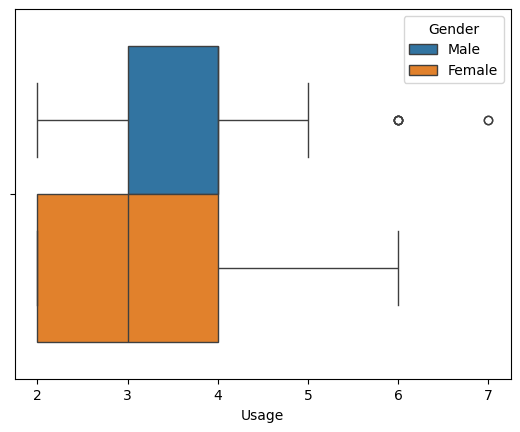

In [93]:
sns.boxplot(x="Usage", hue="Gender", data=df)

In [109]:
pd.crosstab(index=df['Gender'], columns=df['Usage'], margins=True)

Usage,2,3,4,5,6,7,All
Gender,,,,,,,
Female,20,33,14,7,2,0,76
Male,13,36,38,10,5,2,104
All,33,69,52,17,7,2,180


In [94]:
usage_male = df[df['Gender'] == "Male"]['Usage']
usage_female = df[df['Gender'] == "Female"]['Usage']

In [96]:
usage_male.describe()

count    104.000000
mean       3.653846
std        1.095172
min        2.000000
25%        3.000000
50%        4.000000
75%        4.000000
max        7.000000
Name: Usage, dtype: float64

In [98]:
usage_female.describe()

count    76.000000
mean      3.184211
std       1.016012
min       2.000000
25%       2.000000
50%       3.000000
75%       4.000000
max       6.000000
Name: Usage, dtype: float64

**Inference:**
- For both genders, 75th percentile is same, ie. 4 days in a week.
- Minimum value for both genders is 2 days.
- 25th percentile for females is 2, whereas it is 3 for males.
- Mean usage for men > women

<br>

#### HT: Is avg expected usage of men statistically greater than women?


> **Setting the Hypothesis**

- H0: Avg usage for men and women is same ($μ_1 = μ_2$).
- Ha: Avg usage for men is statistically greater than that of women ($μ_1 > μ_2$).

> **Selecting Hypothesis Test**

From the boxplot we can see that these samples do not follow Normal distribution.

Hence, we will have to use non-parametric alternate to T-test, i.e. **Mann Whitney U Test**

In [99]:
u_statistic, p_value = mannwhitneyu(usage_male, usage_female, alternative="greater")
u_statistic, p_value

(4956.0, 0.0011733205788361646)

> **Interpreting the results**

In [100]:
if p_value < 0.05:
  print("Reject Null Hypothesis")
  print("Avg usage for men is statistically greater than that of women")
else:
  print("Fail to reject Null Hypothesis")
  print("Avg usage for men and women is same")

Reject Null Hypothesis
Avg usage for men is statistically greater than that of women


### `Usage` vs `Product`

<Axes: xlabel='Usage', ylabel='count'>

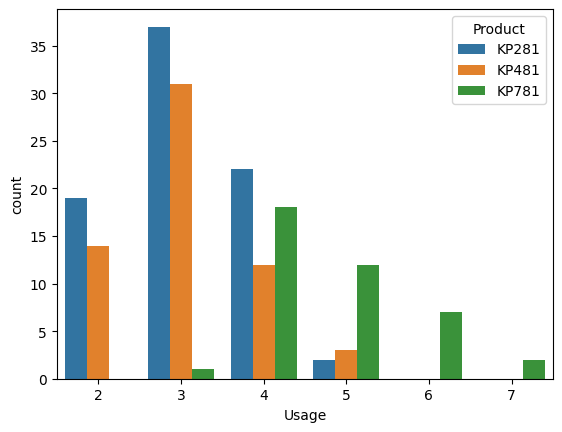

In [101]:
sns.countplot(x="Usage", hue="Product", data=df)

In [103]:
pd.crosstab(index=df['Usage'], columns=df['Product'], margins=True)

Product,KP281,KP481,KP781,All
Usage,,,,
2,19,14,0,33
3,37,31,1,69
4,22,12,18,52
5,2,3,12,17
6,0,0,7,7
7,0,0,2,2
All,80,60,40,180


**Inference:**
- K281 is most popular choice where `Usage <= 4`
  - P(KP281 | Usage<=4) = $\frac{19+37+22}{33+69+52} = 0.506$
- At `Usage=4`, KP781 is also decently popular.
 - P(KP281 | Usage=4) = $\frac{22}{52} = 0.423$ and P(KP781 | Usage=4) = $\frac{18}{52} = 0.346$
- For `Usage > 4`, KP781 is the most preferred choice.
 - P(KP781 | Usage>4) = $\frac{12+7+2}{17+7+2} = 0.808$
 - For `Usage = 6 and 7`, no other models were observed.


### `MaritalStatus` vs `Fitness`

<Axes: xlabel='MaritalStatus', ylabel='count'>

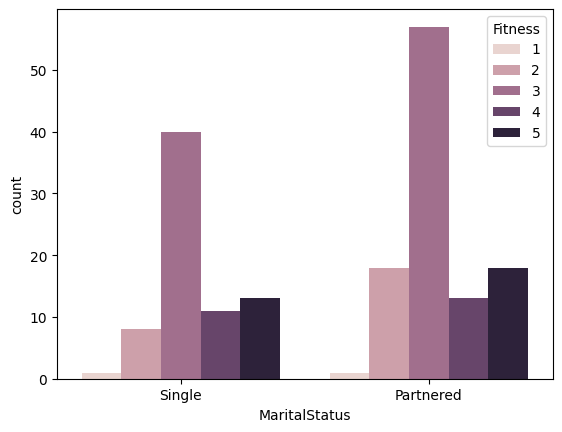

In [111]:
sns.countplot(x="MaritalStatus", hue="Fitness", data=df)

In [112]:
fitness_single = df[df['MaritalStatus'] == "Single"]['Fitness']
fitness_partnered = df[df['MaritalStatus'] == "Partnered"]['Fitness']

fitness_single.mean(), fitness_partnered.mean()

(3.3698630136986303, 3.2710280373831777)

**Inference:**
- It seems that partnered people are more fit on an average, but that is because of higher frequency of Partnered people in the data.
- Upon comparing mean, we can see that avg fitness for single people is greater.

<br>

#### HT: Do single peole have greater fitness score than partnered?

> **Setting the Hypothesis**

- H0: Avg fitness scores of single and partnered people is same ($μ_1 = μ_2$)
- Ha: Avg fitness scores of single people is greater than and partnered people ($μ_1 > μ_2$)

> **Choosing Hypothesis test**



In [113]:
_, p = levene(fitness_single, fitness_partnered)

print(p)
if p<0.05:
  print("Sample variances are not equal")
else:
  print("Sample variances are equal")

0.9930745546242833
Sample variances are equal


Hence, we can use the **Student's T-test**, subject to assumption of normality.

In [114]:
_, p = shapiro(fitness_single)

print(p)
if p<0.05:
  print("Sample does not follow Normal distribution")
else:
  print("Sample follows Normal Distribution")

1.4089204114497988e-07
Sample does not follow Normal distribution


In [115]:
_, p = shapiro(fitness_partnered)

print(p)
if p<0.05:
  print("Sample does not follow Normal distribution")
else:
  print("Sample follows Normal Distribution")

1.3325165415523088e-09
Sample does not follow Normal distribution


Therefore, we will have to go for non-parametric **Mann Whitney U Test**

In [116]:
u_statistic, p_value = mannwhitneyu(fitness_single, fitness_partnered, alternative="greater")
u_statistic, p_value

(4162.0, 0.20691932633296706)

> **Interpreting the results**

In [117]:
if p_value < 0.05:
  print("Reject Null Hypothesis")
  print("Avg fitness for single people is statistically greater than partnered people")
else:
  print("Fail to reject Null Hypothesis")
  print("Avg fitness for single and partnered people is same")

Fail to reject Null Hypothesis
Avg fitness for single and partnered people is same


### `MaritalStatus` vs `Usage`

<Axes: xlabel='Usage', ylabel='count'>

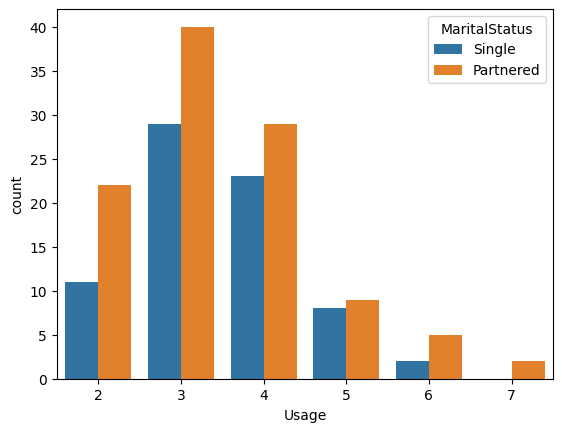

In [125]:
sns.countplot(x="Usage", hue="MaritalStatus", data=df)

#### Does Marital Status influence usage?

In [128]:
usage_single = df[df['MaritalStatus'] == 'Single']['Usage']
usage_partnered = df[df['MaritalStatus'] == 'Partnered']['Usage']

In [127]:
usage_single.describe()

count    73.000000
mean      3.465753
std       0.972999
min       2.000000
25%       3.000000
50%       3.000000
75%       4.000000
max       6.000000
Name: Usage, dtype: float64

In [129]:
usage_partnered.describe()

count    107.000000
mean       3.448598
std        1.159324
min        2.000000
25%        3.000000
50%        3.000000
75%        4.000000
max        7.000000
Name: Usage, dtype: float64

**Inference:**
- Based on the std dev value for both these samples, we can see that any difference in their mean value is due to chance, and is not statistically different.
- Hence, marital status **does not impact usage**.

## Numerical Features (Correlation)

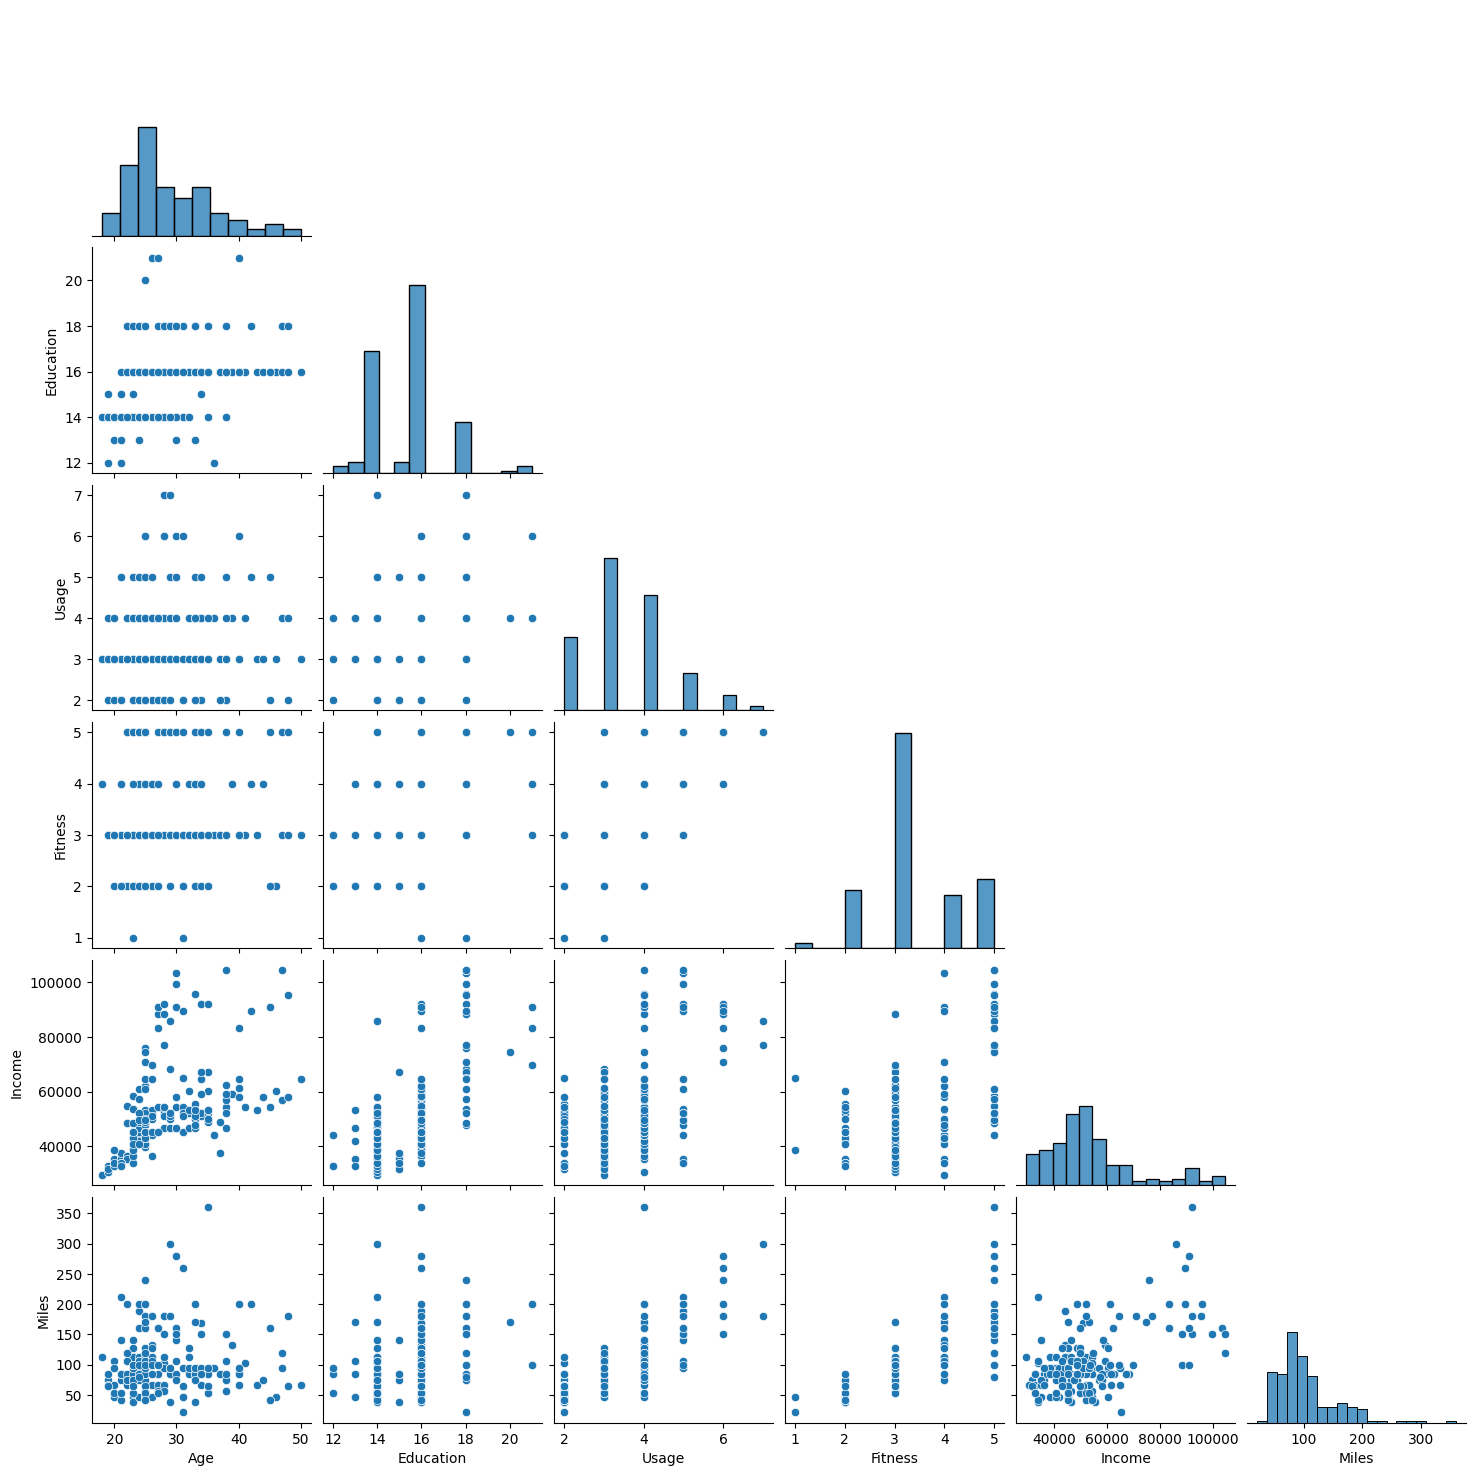

In [155]:
sns.pairplot(df, corner=True)

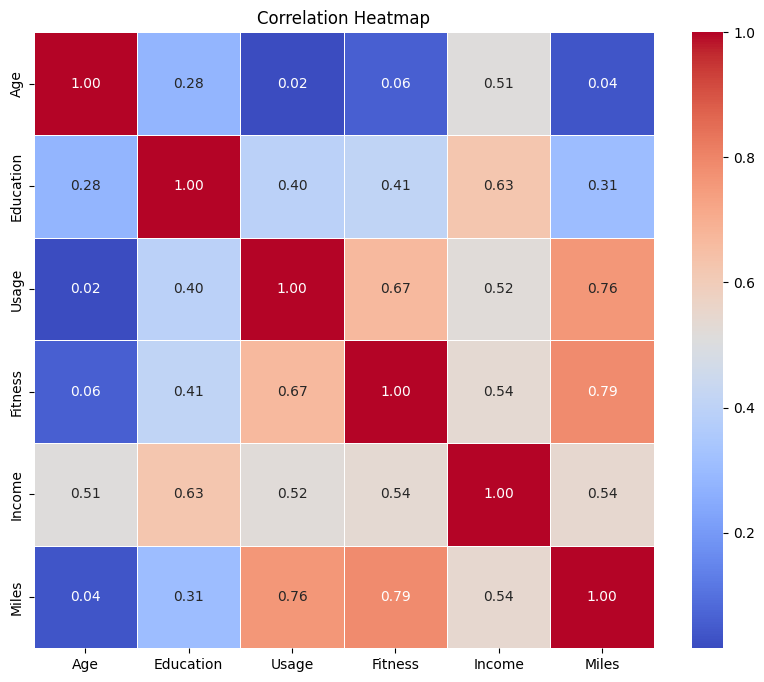

In [156]:
# Select numerical columns for correlation analysis
numerical_cols = df.select_dtypes(include=['int', 'float']).columns

# Calculate the correlation matrix
corr_matrix = df[numerical_cols].corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm'
, fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

**Inference:**
- Fitness of individual is strongy positively correlated with how many miles they run on treadmill.
- Fitness and Usage are also positively correlated.
- Miles run on treadmill is also strongly positively correlated with the number of times customer planned to use in a week (Usage).
- Miles run is not impacted by Age of individual.
- A customer's income is slightly positively correlated with their years of education.
- Among these treadmill customers, Fitness levels are not dependent on age.
- Additionally, Usage is also not dependent on age.

## Categorical Feature and Numerical Feature

### `Product` vs `Income`

<Axes: xlabel='Product', ylabel='Income'>

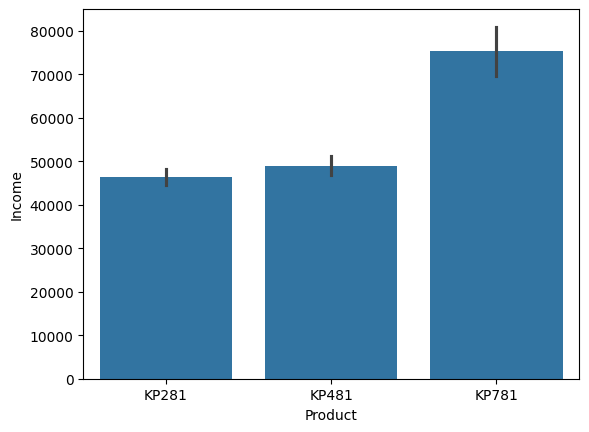

In [157]:
sns.barplot(x=df['Product'], y=df['Income'])

<Axes: xlabel='Income'>

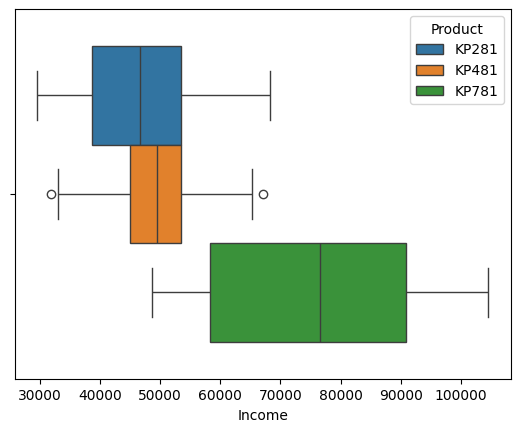

In [158]:
sns.boxplot(x="Income", hue="Product", data=df)

**Inference:**
- It seems that income level of customers buying KP781 model is much higher than those going for other models.
- Income level of customers buying KP281 and KP481 is relatively comparable.

<Br>

#### HT: Is there a relation between the income levels and the model bought?

Let's check if customers buying different products (KP281, KP481, KP781) have similar incomes, or is there a significant difference.

> **Setting up hypothesis**

- H0: Average income of customers buying the different products is equal.
- Ha: Average income of customers buying the different products is statistically different.

In [159]:
income_kp281 = df[df["Product"]=="KP281"]["Income"]
income_kp481 = df[df["Product"]=="KP481"]["Income"]
income_kp781 = df[df["Product"]=="KP781"]["Income"]

income_kp281.mean(), income_kp481.mean(), income_kp781.mean()

(46418.025, 48973.65, 75441.575)

From the plot it seems like income level for KP781 customers is significantly high than others.

Lets validate the same.

>  **Selecting appropriate test**

Since we need to conduct test between 1 numeric and 1 categorical feature, we would've used T-test

But since there are >2 categries, we will use **ANOVA**, subject to it's assumptions are being met.

<Br>

Checking for equal variances.


In [167]:
from scipy.stats import levene, shapiro

In [168]:
_, p = levene(income_kp281, income_kp481, income_kp781)

print(p)
if p<0.05:
  print("Samples do not have equal variances.")
else:
  print("Samples have equal variances.")

1.4384394862120984e-14
Samples do not have equal variances.


Hence, we'll have to turn to non-parametric alternative to aNOVA, i.e. **Kruskal Wallis test**.


In [169]:
from scipy.stats import kruskal

In [170]:
stat, p_value = kruskal(income_kp281, income_kp481, income_kp781)

print(p_value)
if p_value < 0.05:
  print("Reject Null Hypothesis")
  print("Average income of customers buying the different products is statistically different.")
else:
  print("Fail to reject Null Hypothesis")
  print("Average income of customers buying the different products is equal.")

4.562357014275808e-14
Reject Null Hypothesis
Average income of customers buying the different products is statistically different.


From the result of this Kruskal Wallis test, and from the boxplot we saw earlier, we can intuitively conclude that

- Income<sub>KP281</sub> < Income<sub>KP781</sub>
- Income<sub>KP481</sub> < Income<sub>KP781</sub>

But what about between the groups of KP281 and KP481?

Let's check that.


> **Setting up hypothesis**

- H0: Average income of customers purchasing KP281 and KP481 is same.
- Ha: Average income of customers purchasing KP281 and KP481 is different.

> **Chossing the appropriate test**

T-test, subject to it's assumptions are met.

In [171]:
_, p = shapiro(income_kp281)

print(p)
if p < 0.05:
  print("Data is not Gaussian")
else:
  print("Data is Gaussian")

0.14890699088573456
Data is Gaussian


In [172]:
_, p = shapiro(income_kp481)

print(p)
if p < 0.05:
  print("Data is not Gaussian")
else:
  print("Data is Gaussian")

0.25031617283821106
Data is Gaussian


Checking for equal variances.

In [173]:
_, p = levene(income_kp281, income_kp481)

print(p)
if p<0.05:
  print("Samples do not have equal variances.")
else:
  print("Samples have equal variances.")

0.4174278974719371
Samples have equal variances.


Hence, we will use **T-test**.

> **Conducting Hypothesis Test**


In [174]:
from scipy.stats import ttest_ind

In [175]:
t_stat, p_value = ttest_ind(income_kp281, income_kp481, alternative="two-sided")
t_stat, p_value

(-1.6817688139914835, 0.09487529747264932)

> **Interpreting results**

In [176]:
if p_value < 0.05:
  print("Reject Null Hypothesis")
  print("Average income of customers purchasing KP281 and KP481 is different.")
else:
  print("Fail to reject Null Hypothesis")
  print("Average income of customers purchasing KP281 and KP481 is same.")

Fail to reject Null Hypothesis
Average income of customers purchasing KP281 and KP481 is same.


In [177]:
if p_value < 0.10:
  print("Reject Null Hypothesis")
  print("Average income of customers purchasing KP281 and KP481 is different.")
else:
  print("Fail to reject Null Hypothesis")
  print("Average income of customers purchasing KP281 and KP481 is same.")

Reject Null Hypothesis
Average income of customers purchasing KP281 and KP481 is different.


We can conclude with 90% confidence that Average income of customers purchasing KP281 and KP481 is different.

> **Business Insight**
- There seems to be a relation between Income and the model being bought.
- Sales person can leverage the customer's income info to suggest a model that is appropriate, thereby increasing sales/

---

### `Gender` vs `Income`

<Axes: xlabel='Income'>

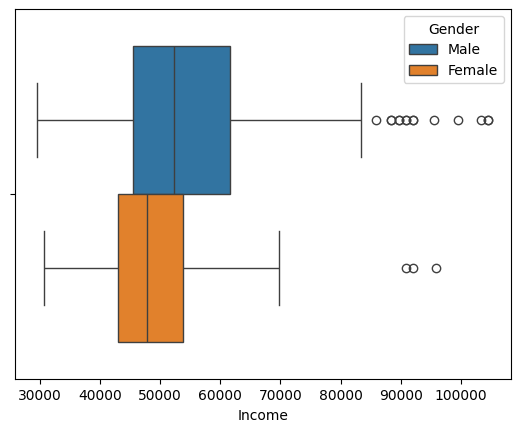

In [179]:
sns.boxplot(x="Income", hue="Gender", data=df_clip)

In [ ]:
income_male = df[df['Gender'] == 'Male']['Income']
income_female = df[df['Gender'] == 'Female']['Income']

income_male.mean(), income_female.mean()

(56562.75961538462, 49828.90789473684)

<Axes: ylabel='Income'>

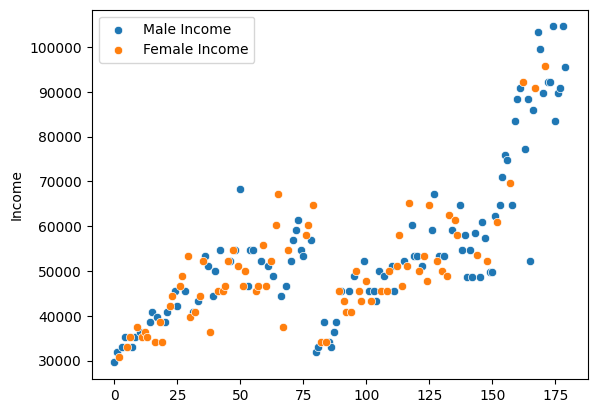

In [ ]:
sns.scatterplot(income_male, legend="brief", label="Male Income")
sns.scatterplot(income_female, legend="brief", label="Female Income")

**Inference:**
- At a glance it is evident that income level of males are more than females on an average.


<br>

#### HT: Do males earn more than females on an average?


Let's check it statistically using Hypothesis Testing.


> **Null and Alternate Hypothesis**

- H0: Average income of males and females is equal ($μ_{male} = μ_{female}$)
- Ha: Average income of males is greater than females ($μ_{male} > μ_{female}$)

> **Selecting Hypothesis Test**

Since we are dealing with 1 numeric and 1 categorical feature, most suitable test is **T-test**.


In [181]:
from scipy.stats import levene, shapiro

In [182]:
_, p = levene(income_male, income_female)
print(p)

if p<0.05:
  print("Samples do not have equal variances")
else:
  print("Samples have equal variances.")

0.013602259044517919
Samples do not have equal variances


Since samples do not have equal variance, it violates the assumption of T-test.

We need to use **Welch T-test**.

<Br>

But first lets check if the samples follow normal distribution

In [183]:
_, p = shapiro(income_male)
print(p)

if p<0.05:
  print("Samples do not follow normal distribution")
else:
  print("Samples follow Normal Distribution")

5.137452490089345e-07
Samples do not follow normal distribution


In [184]:
_, p = shapiro(income_female)
print(p)

if p<0.05:
  print("Samples do not follow normal distribution")
else:
  print("Samples follow Normal Distribution")

2.9869515856262296e-06
Samples do not follow normal distribution


Therefore, we will have to work with Non-parametric alternative to T-test, i.e. **Mann Whitney U-Test**.

> **Conducting Hypothesis Test**

In [185]:
from scipy.stats import mannwhitneyu

In [186]:
u_statistic, p_value = mannwhitneyu(income_male, income_female, alternative="greater")
u_statistic, p_value

(4756.0, 0.009943237014423288)

> **Interpreting the results**

In [187]:
if p_value < 0.05:
  print("Reject Null Hypothesis")
  print("Average income of males is greater than females")
else:
  print("Fail to reject Null Hypothesis")
  print("Average income of males and females are equal")

Reject Null Hypothesis
Average income of males is greater than females


### `MaritalStatus` vs `Income`

<Axes: xlabel='Income'>

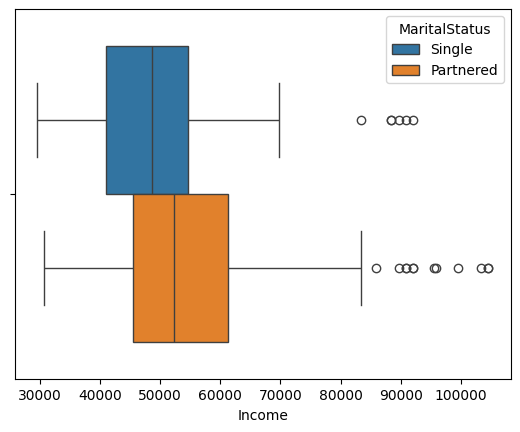

In [138]:
sns.boxplot(x="Income", hue="MaritalStatus", data=df_clip)

In [144]:
income_single = df[df['MaritalStatus'] == 'Single']['Income']
income_partnered = df[df['MaritalStatus'] == 'Partnered']['Income']

In [143]:
income_single.describe()

count       73.000000
mean     50724.424658
std      14534.129778
min      29562.000000
25%      40932.000000
50%      48658.000000
75%      54576.000000
max      92131.000000
Name: Income, dtype: float64

In [142]:
income_partnered.describe()

count       107.00000
mean      55763.00000
std       17499.65758
min       30699.00000
25%       45480.00000
50%       52302.00000
75%       61202.00000
max      104581.00000
Name: Income, dtype: float64

<Axes: ylabel='Income'>

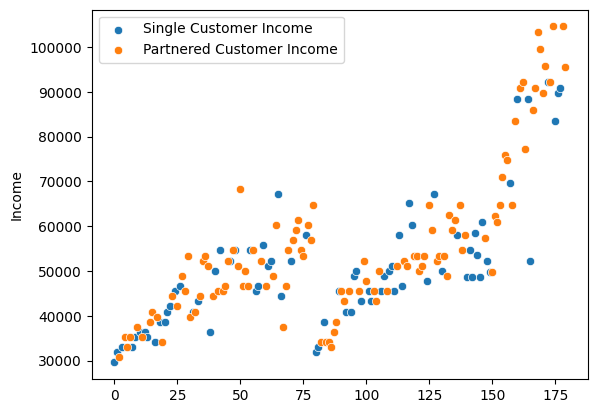

In [140]:
sns.scatterplot(income_single, legend="brief", label="Single Customer Income")
sns.scatterplot(income_partnered, legend="brief", label="Partnered Customer Income")

**Inference:**
- At a glance it seems that income level of partnered individuals is more than single individuals.


<br>

#### HT: Do partnered individuals earn more than single people on an average?


Let's check it statistically using Hypothesis Testing.


> **Null and Alternate Hypothesis**

- H0: Average income of single and partered people is equal ($μ_{1} = μ_{2}$)
- Ha: Average income of single people is lesser than partnered people ($μ_{1} < μ_{2}$)

> **Selecting Hypothesis Test**

Since we are dealing with 1 numeric and 1 categorical feature, most suitable test is **T-test**.


In [ ]:
from scipy.stats import levene, shapiro

In [145]:
_, p = levene(income_single, income_partnered)
print(p)

if p<0.05:
  print("Samples do not have equal variances")
else:
  print("Samples have equal variances.")

0.2381365178338372
Samples have equal variances.


Since samples have equal variance, we can use Student's T-test

<Br>

But first lets check if the samples follow normal distribution

In [146]:
_, p = shapiro(income_single)
print(p)

if p<0.05:
  print("Samples do not follow normal distribution")
else:
  print("Samples follow Normal Distribution")

2.8792198918381473e-06
Samples do not follow normal distribution


In [147]:
_, p = shapiro(income_partnered)
print(p)

if p<0.05:
  print("Samples do not follow normal distribution")
else:
  print("Samples follow Normal Distribution")

6.976998179197835e-08
Samples do not follow normal distribution


Therefore, we will have to work with Non-parametric alternative to T-test, i.e. **Mann Whitney U-Test**.

> **Conducting Hypothesis Test**

In [149]:
u_statistic, p_value = mannwhitneyu(income_single, income_partnered, alternative="less")
u_statistic, p_value

(3177.5, 0.016971248796539225)

> **Interpreting the results**

In [151]:
if p_value < 0.05:
  print("Reject Null Hypothesis")
  print("Average income of single people is lesser than partnered people")
else:
  print("Fail to reject Null Hypothesis")
  print("Average income of single and partnered people are equal")

Reject Null Hypothesis
Average income of single people is lesser than partnered people


### `Fitness` vs `Income`

<Axes: xlabel='Income'>

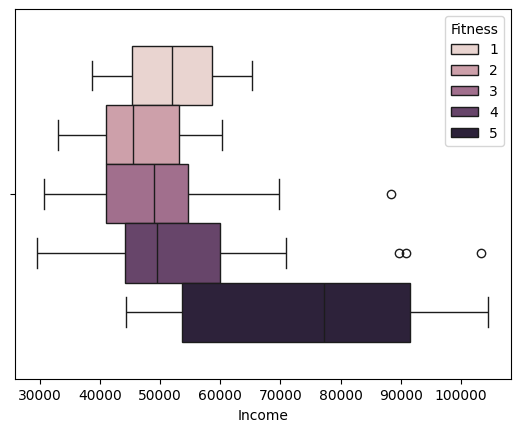

In [152]:
sns.boxplot(x="Income", hue="Fitness", data=df_clip)

**Inference:**
- This data might not be most reliable to do an relational analysis between Income and Fitness.
- IT shows income level of people with `Fitness=5` as highest.
- This might be only because this category of customers are the ones that bought KP781.

### `Age` vs `Product`

<Axes: xlabel='Age'>

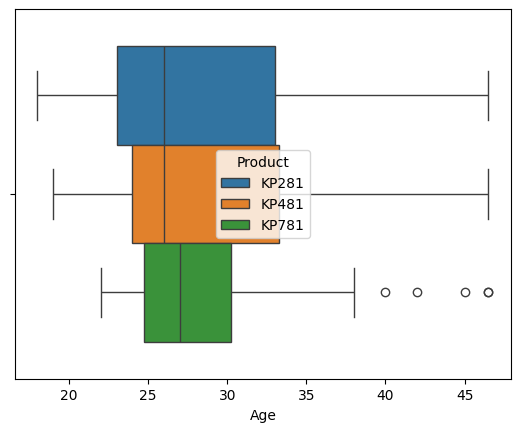

In [154]:
sns.boxplot(x="Age", hue="Product", data=df_clip)

**Inference:**
- Similar pattern is observed for all models. Majortity of customers are young adults (25 to 30 year olds)
- Range for KP781 model is most shrunk.
 - This is because this model is mostly preferred by people with `Fitness=5`
 - Which is rarely observed in people over 30.

### `Age` vs `Fitness`

<Axes: xlabel='Age'>

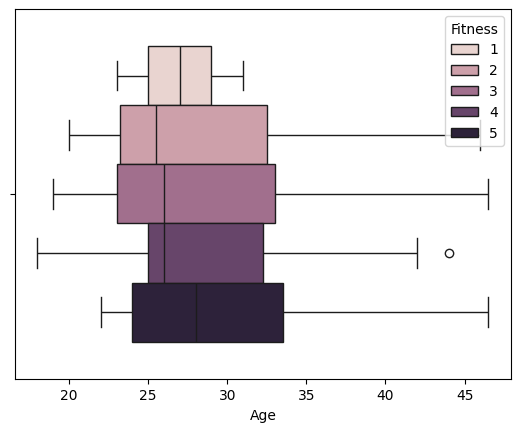

In [155]:
sns.boxplot(x="Age", hue="Fitness", data=df_clip)

### `Age` vs `Usage`

<Axes: xlabel='Age', ylabel='Usage'>

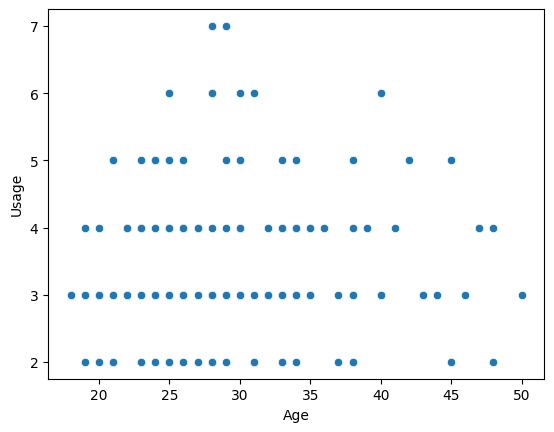

In [156]:
sns.scatterplot(x="Age", y="Usage", data=df)

**Inference:**
- Peak usage can be seen in adults of age 25 to 32
- Individuals with usage=3 can be seen in all age groups.

### `Education` vs `Product`

<Axes: xlabel='Education'>

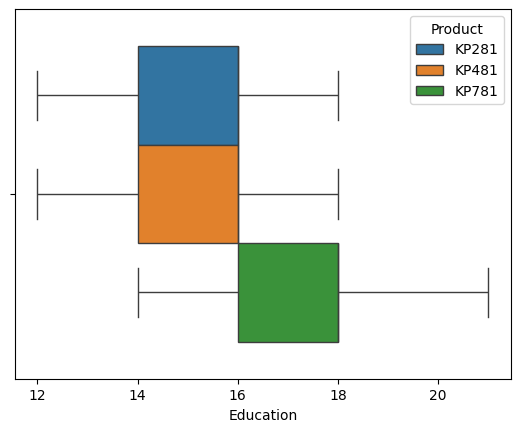

In [159]:
sns.boxplot(x="Education", hue="Product", data=df)

**Inference:**
- Education level for KP281 and KP481 is identical.
- Education level for KP781 seems to be slightly higher than the other products.

<br>

#### HT: Does Education impact which product is bought?

> **Setting the Hypothesis**

- H0: Education level among customers of all models is same.
- Ha: Education level among customers of KP781 is higher than that for other models.

In [160]:
education_kp781 = df[df['Product'] == "KP781"]['Education']
education_kp781_complement = df[df['Product'] != "KP781"]['Education']

In [161]:
education_kp781.describe()

count    40.000000
mean     17.325000
std       1.639066
min      14.000000
25%      16.000000
50%      18.000000
75%      18.000000
max      21.000000
Name: Education, dtype: float64

In [162]:
education_kp781_complement.describe()

count    140.000000
mean      15.071429
std        1.215268
min       12.000000
25%       14.000000
50%       16.000000
75%       16.000000
max       18.000000
Name: Education, dtype: float64

> **Choosing Hypothesis Test**

Since we're dealing with one categorical and one numeric feature, we will employ T-test.

In [163]:
_, p = levene(education_kp781, education_kp781_complement)
print(p)

if p<0.05:
  print("Samples do not have equal variances")
else:
  print("Samples have equal variances.")

0.37951843751194425
Samples have equal variances.


Since samples have equal variance, we can use Student's T-test

<Br>

But first lets check if the samples follow normal distribution

In [164]:
_, p = shapiro(education_kp781)
print(p)

if p<0.05:
  print("Samples do not follow normal distribution")
else:
  print("Samples follow Normal Distribution")

6.805123121012002e-05
Samples do not follow normal distribution


In [165]:
_, p = shapiro(education_kp781_complement)
print(p)

if p<0.05:
  print("Samples do not follow normal distribution")
else:
  print("Samples follow Normal Distribution")

3.1701590137711566e-12
Samples do not follow normal distribution


We will have to use **Mann Whitney U Test**

> **Conducting Hypothesis Test**

In [166]:
u_statistic, p_value = mannwhitneyu(education_kp781, education_kp781_complement, alternative="greater")
u_statistic, p_value

(4766.0, 1.726513592447226e-13)

> **Interpreting the results**

In [167]:
if p_value < 0.05:
  print("Reject Null Hypothesis")
  print("Education level among customers of KP781 is higher than that for other models.")
else:
  print("Fail to reject Null Hypothesis")
  print("Education level among customers of all models is same.")

Reject Null Hypothesis
Education level among customers of KP781 is higher than that for other models.


Note:
- One reasoning behind this observed relation might be high correlation between Education and Income.
- We already know that people with higher incomes are known to prefer KP781.

### `Miles` vs `Product`

<Axes: xlabel='Miles'>

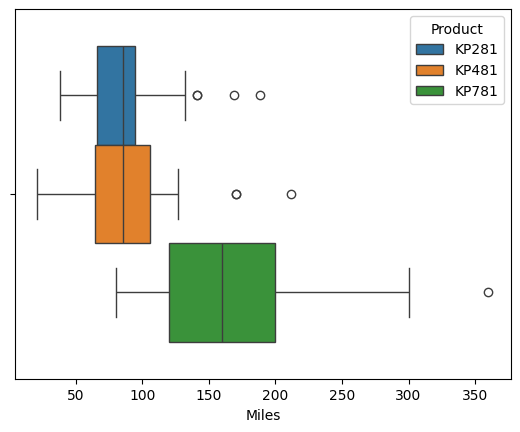

In [169]:
sns.boxplot(x="Miles", hue="Product", data=df)

**Inference:**
- It seems that miles run on KP781 model is much more than other models.

<br>

#### HT: Is there a difference in miles run by customers of different models?

> **Setting the Hypothesis**

- H0: Avg miles run is same across all models
- Ha: There is significant difference in the number of miles a customer runs in different models

In [170]:
miles_kp281 = df[df['Product'] == "KP281"]['Miles']
miles_kp481 = df[df['Product'] == "KP481"]['Miles']
miles_kp781 = df[df['Product'] == "KP781"]['Miles']

> **Choosing Hypothesis Test**

Since we have to compare a numeric and a categorical feature (with 3 categories), we will use ANOVA, subject to it's assumptions are met.

In [171]:
_, p = levene(miles_kp281, miles_kp481, miles_kp781)
print(p)

if p<0.05:
  print("Samples do not have equal variances")
else:
  print("Samples have equal variances.")

9.441022608212007e-05
Samples do not have equal variances


Hence, we will have to use the non-paramteric alternative to ANOVA, ie. **Kruskal Wallis Test**.

In [173]:
from scipy.stats import kruskal

In [174]:
f_stat, p_value = kruskal(miles_kp281, miles_kp481, miles_kp781)
f_stat, p_value

(66.0482427167671, 4.5478520133931625e-15)

In [175]:
if p_value < 0.05:
  print("Reject Null Hypothesis")
  print("There is significant difference in the number of miles a customer runs in different models")
else:
  print("Fail to reject Null Hypothesis")
  print("Avg miles run is same across all models")

Reject Null Hypothesis
There is significant difference in the number of miles a customer runs in different models


> **Business Insights:**
- Based on how many miles a customer aims to run, the salesperson should recommend models, for better customer satisfaction and sales.

### `Miles` vs `Gender`

<Axes: xlabel='Miles'>

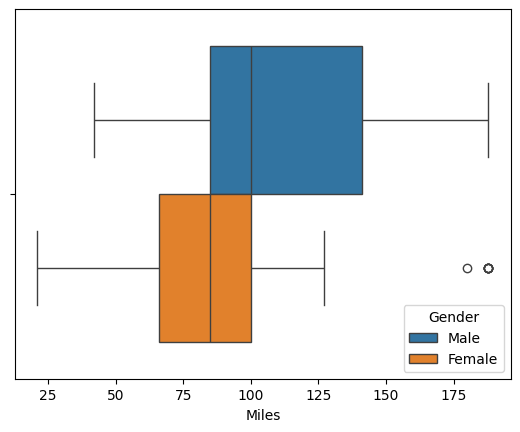

In [177]:
sns.boxplot(x="Miles", hue="Gender", data=df_clip)

**Inference:**
- It seems that miles run by Males is greater than females, on an average

Let's test this statistically

<br>

#### HT: Do men run more miles on an average than females?

> **Setting the Hypothesis**

- H0: Men and Women run equal number of miles on treadmills, on an average.
- Ha: Men run more miles than women, on an average.

In [179]:
miles_male = df[df['Gender'] == "Male"]['Miles']
miles_female = df[df['Gender'] == "Female"]['Miles']

miles_male.mean(), miles_female.mean()

(112.82692307692308, 90.01315789473684)

> **Choosing Hypothesis Test**

T-test

In [180]:
_, p = levene(miles_male, miles_female)
print(p)

if p<0.05:
  print("Samples do not have equal variances")
else:
  print("Samples have equal variances.")

0.08442363479177155
Samples have equal variances.


Since samples have equal variance, we can use Student's T-test

<Br>

But first lets check if the samples follow normal distribution

In [181]:
_, p = shapiro(miles_male)
print(p)

if p<0.05:
  print("Samples do not follow normal distribution")
else:
  print("Samples follow Normal Distribution")

8.466783185667737e-08
Samples do not follow normal distribution


In [182]:
_, p = shapiro(miles_female)
print(p)

if p<0.05:
  print("Samples do not follow normal distribution")
else:
  print("Samples follow Normal Distribution")

1.531800286613816e-08
Samples do not follow normal distribution


Hence, we use **Mann Whitney U test**

In [183]:
u_stat, p_value = mannwhitneyu(miles_male, miles_female, alternative="greater")
u_stat, p_value

(5138.0, 0.0002890848360397279)

In [184]:
if p_value < 0.05:
  print("Reject Null Hypothesis")
  print("Men run more miles than women, on an average.")
else:
  print("Fail to reject Null Hypothesis")
  print("Men and Women run equal number of miles on treadmills, on an average.")

Reject Null Hypothesis
Men run more miles than women, on an average.


> **Business Insight**
- Men should be nudged to go for KP781 model, as their usage (miles run) is more.
- This would ensure good NPS.